In [1]:
%load_ext autoreload
%autoreload 2
from load import *
import torch
import yaml
import logging
from imp import reload
import matplotlib.pyplot as plt
from liftpose.vision_3d import world_to_camera
from tqdm import tqdm
from load import get_btch
reload(logging)
logger = logging.getLogger(__name__).setLevel(logging.INFO)
tqdm.get_lock().locks = []

# decleare data parameters
par_train = {'data_dir'       : '/data/LiftFly3D/openmonkey/OMS_Dataset/', # change the path 
             'out_dir'        : './out_proj_then_bln_no_missing_cameras_norm/',
             'train_subjects' : ["7", "9a", "9b", "10", "11"],
             'test_subjects'  : ["9"]}

# merge with training parameters
par_data = yaml.full_load(open('param.yaml', "rb"))
par = {**par_data["data"], **par_train}
plt.style.use('dark_background')

In [26]:
train_2d, train_3d, train_keys = list(), list(), list()
for btch in par_train["train_subjects"]:
    Data, _ = get_btch(btch)
    for idx, (k,v) in enumerate(Data.items()):
        train_2d.append(Data[k]["points2d_marker"])
        train_3d.append(Data[k]["points3d"])
        train_keys.append(k)

test_2d, test_3d, test_keys = list(), list(), list()
for btch in par_train["test_subjects"]:
    Data, _ = get_btch(btch)
    for idx, (k,v) in enumerate(Data.items()):
        test_2d.append(Data[k]["points2d_marker"])
        test_3d.append(Data[k]["points3d"])
        test_keys.append(k)

train_2d, train_3d = np.stack(train_2d), np.stack(train_3d)
test_2d, test_3d = np.stack(test_2d), np.stack(test_3d)

# remove points with with large variance for easier training
good_ind = np.where((train_2d.reshape(train_2d.shape[0], -1)).std(axis=1) < 1000)[0]
train_2d = train_2d[good_ind]
train_3d = train_3d[good_ind]

train_2d /= np.linalg.norm(train_2d, axis=(-1,-2), keepdims=True)
test_2d /= np.linalg.norm(test_2d, axis=(-1,-2), keepdims=True)

In [33]:
import pickle
train_2d_l = pickle.load(open('train2d_proj_then_bln_no_missing_camera_marker.pkl', 'rb'))
train_2d_l2 = pickle.load(open('train2d_proj_then_bln_no_missing_camera.pkl', 'rb'))

In [23]:
import pickle
pickle.dump(train_2d, open('train2d_proj_then_bln_no_missing_camera_marker_norm.pkl', 'wb'))
pickle.dump(train_3d, open('train3d_proj_then_bln_no_missing_camera_marker_norm.pkl', 'wb'))

In [ ]:
from liftpose.main import train_np as lp3d_train

lp3d_train(train_2d=train_2d, test_2d=test_2d, 
           train_3d=train_3d, test_3d=test_3d,
           root=par['roots'][0], target_sets=par['target_sets'], out_dir=par['out_dir'],
           training_kwargs={"epochs":100,  "lr_decay":10000})

/home/user/Desktop/LiftPose3D/liftpose/preprocess.py:144: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(cp_d, axis=0)
/home/user/anaconda3/envs/lf3d/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[main.py:252]:INFO:Saving pre-processed 2D data at /home/user/Desktop/LiftPose3D/examples/openmonkey/out_proj_then_bln_no_missing_cameras_norm/stat_2d.pth.tar.
[main.py:271]:INFO:Saving pre-processed 3D data at /home/user/Desktop/LiftPose3D/examples/openmonkey/out_proj_then_bln_no_missing_cameras_norm/stat_3d.pth.tar.
[main.py:298]:INFO:Starting training model.
[main.py:308]:DEBUG:
==================Options=================
[main.py:309]:DEBUG:{   'batch_size': 64,
    'data_dir': '/home/user/Desktop/LiftPose3D/examples/openmonkey/out_proj_then_bln_no_missing_cameras_norm',
    'drop_input': 0.0,
    'dropout': 0.5,
    'epochs': 100,
    'exp': '',
    'is_train': True,
    'job': 8,
    'linear_size': 1024,
    'load': None,
    'lr': 0.001,
    'lr_decay': 10000,
    'lr_gamma': 0.9,
    'max_norm': True,
    'noise': None,
    'num_stage': 2,
    'out': '/home/user/Desktop/LiftPose3D/examples/openmonkey/out_proj_then_bln_no_missing_cameras_norm',
    'out_dir': '/home/user/Desktop/

Epoch 000 | LR  0.00100 | Loss Test  0.00000 | Loss Train  0.50933|: 100%|██████████| 2382/2382 [00:33<00:00, 71.79it/s]
Epoch 001 | LR  0.00100 | Loss Test  0.12950 | Loss Train  0.24076|: 100%|██████████| 2382/2382 [00:31<00:00, 74.55it/s]
Epoch 002 | LR  0.00100 | Loss Test  0.10718 | Loss Train  0.22344|: 100%|██████████| 2382/2382 [00:32<00:00, 72.83it/s]
Epoch 003 | LR  0.00100 | Loss Test  0.10219 | Loss Train  0.21245|: 100%|██████████| 2382/2382 [00:32<00:00, 73.06it/s]
Epoch 004 | LR  0.00090 | Loss Test  0.09782 | Loss Train  0.20315|: 100%|██████████| 2382/2382 [00:32<00:00, 73.25it/s]
Epoch 005 | LR  0.00090 | Loss Test  0.09621 | Loss Train  0.19728|: 100%|██████████| 2382/2382 [00:32<00:00, 73.15it/s]
Epoch 006 | LR  0.00090 | Loss Test  0.09235 | Loss Train  0.19329|: 100%|██████████| 2382/2382 [00:33<00:00, 71.58it/s]
Epoch 007 | LR  0.00090 | Loss Test  0.09889 | Loss Train  0.18924|: 100%|██████████| 2382/2382 [00:32<00:00, 73.22it/s]
Epoch 008 | LR  0.00081 | Loss T

In [2]:
from liftpose.main import test as lp3d_test
lp3d_test(par['out_dir'])

from liftpose.postprocess import load_test_results
data = torch.load(os.path.join(par['out_dir'], "test_results.pth.tar"))
stat_2d, stat_3d = (
    torch.load(os.path.join(par['out_dir'], "stat_2d.pth.tar")),
    torch.load(os.path.join(par['out_dir'], "stat_3d.pth.tar")),
)
test_3d_gt, test_3d_pred, _ = load_test_results(data, stat_2d, stat_3d)

[main.py:409]:INFO:starting testing in path: ./out_proj_then_bln_no_missing_cameras_norm/
[lift.py:31]:INFO:Training on the device: cuda:0
[lift.py:57]:INFO:total params: 4.27M
[lift.py:63]:INFO:loading ckpt from './out_proj_then_bln_no_missing_cameras_norm/ckpt_best.pth.tar'
[lift.py:71]:INFO:ckpt loaded (epoch: 94 | err: 0.3867566799247373)
[lift.py:107]:INFO:Saving results: /home/user/Desktop/LiftPose3D/examples/openmonkey/out_proj_then_bln_no_missing_cameras_norm/test_results.pth.tar


['Nose', 'Head', 'Neck', 'RShoulder', 'RHand', 'Shoulder', 'Hand', 'Hip', 'RKnee', 'RFoot', 'Knee', 'Foot', 'Tail']


(0.0, 15.0)

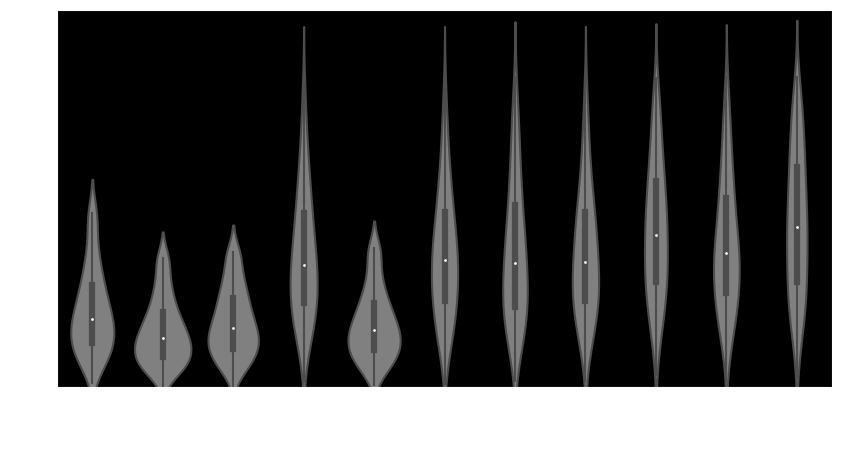

In [5]:
%matplotlib inline
from liftpose.plot import violin_plot
plt.figure(figsize=(10,5), dpi=100)
names = par_data["vis"]["names"]
print(names)
order = names.copy()
order.remove('Neck')
order.remove('Tail')
ax = plt.gca()
violin_plot(ax, test_3d_gt, test_3d_pred, test_keypoints=np.ones_like(test_3d_gt), joints_name=names, body_length=2.21, units='?', order=order)
plt.ylim([0,15])

In [6]:
Data, cameras = get_btch('9')

3468 ('9', 13920, '18260136')


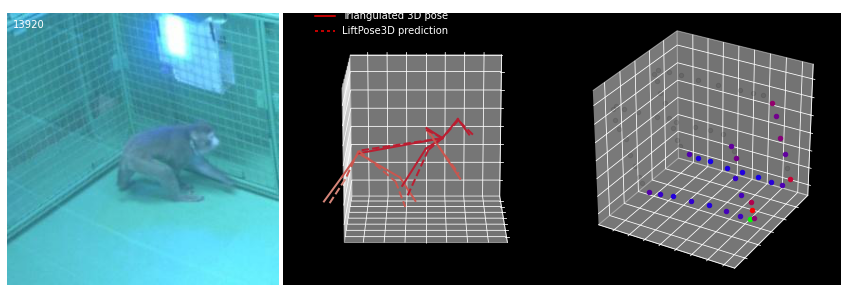

In [13]:
%matplotlib inline
from liftpose.plot import plot_pose_3d

out_path = './images/'
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0, hspace=0)
ax2d = fig.add_subplot(131)
ax3d = fig.add_subplot(132, projection='3d')
ax3d_cameras = fig.add_subplot(133, projection='3d')

idx = np.random.randint(test_3d_pred.shape[0])
k = list(Data.keys())[idx]
print(idx, k)

btch, img_id, cam = k
img_name = '/data/LiftFly3D/openmonkey/OMS_Dataset/Images/batch' + str(btch) + '_' + str(img_id).zfill(9) + '_' + str(cam) + '.jpg'
ax2d.imshow(plt.imread(img_name))
ax2d.text(x=5, y=15, s=f"{img_id}")

ax3d.view_init(elev=-75, azim=-90)
plot_pose_3d(ax=ax3d, tar=test_3d_gt[idx],
             pred=test_3d_pred[idx],
             bones=par_data["vis"]["bones"], 
             limb_id=par_data["vis"]["limb_id"], 
             colors=par_data["vis"]["colors"], 
             normalize=True)

err = err_for_frame(Data, cameras, img_id, test_3d_gt, test_3d_pred)
plot_cameras_err(ax=ax3d_cameras, err=err, mi=0.04, ma=0.2, cameras=cameras, curr_camera=cam)

ax2d.axis('off')
from matplotlib.ticker import NullFormatter
lim = [-0.75, 0.75]
ax3d.set_xlim(lim)
ax3d.set_ylim(lim)
ax3d.set_zlim(lim)
ax3d.xaxis.set_major_formatter(NullFormatter())
ax3d.yaxis.set_major_formatter(NullFormatter())
ax3d.zaxis.set_major_formatter(NullFormatter())

ax3d_cameras.xaxis.set_major_formatter(NullFormatter())
ax3d_cameras.yaxis.set_major_formatter(NullFormatter())
ax3d_cameras.zaxis.set_major_formatter(NullFormatter())

In [8]:
def plot_cameras_err(ax, err, mi, ma, cameras, curr_camera):
    # normalize the erros
    color = {k: (e - mi) / (ma - mi) for (k, e) in err.items()}
    color = {k: min(max(e,0),1) for (k, e) in color.items()}
    
    # draw each camera
    for c in cameras.keys():
        C = cameras[c]['C']
        if c != curr_camera:
            col = (color[c], 0, 1-color[c]) if c in color else (0,0,0)
        else:
            col = (0,1,0)
        s = ax.scatter(C[0], C[1], C[2], color=col, alpha=1 if c in color else 0.1)
        
def get_err(pt, pt_pred):
    return np.linalg.norm(pt - pt_pred, axis=-1).mean()

def err_for_frame(Data, cameras, frame_id, test_3d_gt, test_3d_pred):
    err = dict()
    for idx, (_, f, cam_id) in enumerate(Data.keys()):
        if f == frame_id:
            err[cam_id] = get_err(test_3d_gt[idx], test_3d_pred[idx])
            
    return err